<a href="https://colab.research.google.com/github/avinanakarmi/CS634_FinalTermProject_ConfusionMatrix/blob/main/ComparingClassificationAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install statsmodels

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [10]:
red_wine_df = pd.read_csv('sample_data/winequality-red.csv', sep=";")
white_wine_df = pd.read_csv('sample_data/winequality-white.csv', sep=";")
df = pd.concat([red_wine_df, white_wine_df])

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [43]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
print("Dataframe shape", df.shape)
print()
print("Check type of data")
print(df.dtypes)
print()
print("Check for na")
print(df.isna().sum())

Dataframe shape (6497, 12)

Check type of data
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Check for na
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


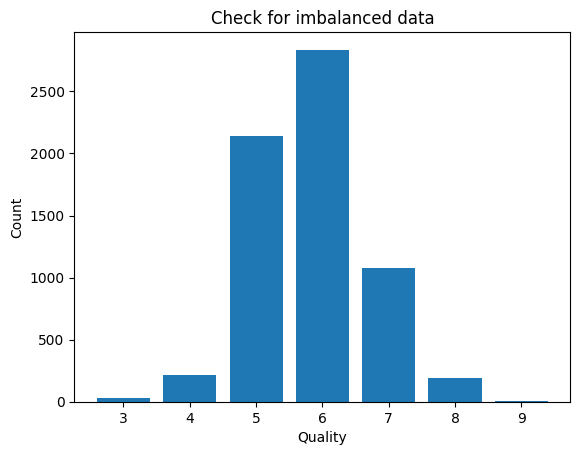

In [27]:
class_dist = df["quality"].value_counts().sort_index()
plt.bar(class_dist.index, class_dist.values)

plt.title("Check for imbalanced data")
plt.xlabel('Quality')
plt.ylabel('Count')

plt.show()

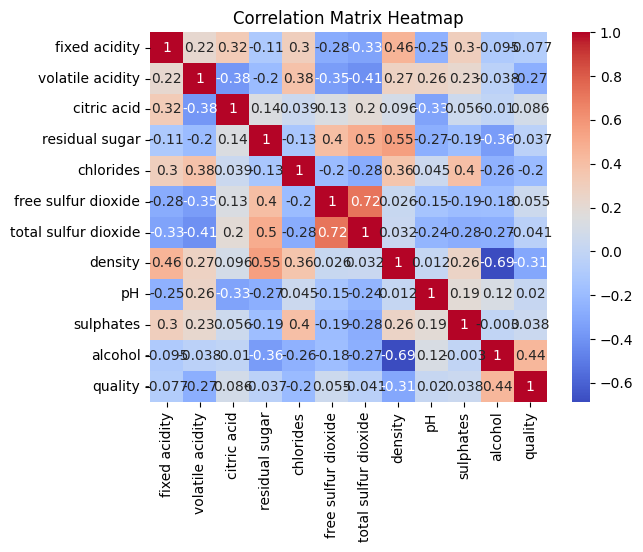

In [35]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix Heatmap')

plt.show()

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop(columns=['quality'])

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                 Feature         VIF
0          fixed acidity   58.897405
1       volatile acidity    8.943681
2            citric acid    9.340251
3         residual sugar    3.576148
4              chlorides    5.575434
5    free sulfur dioxide    8.452180
6   total sulfur dioxide   14.732237
7                density  936.984064
8                     pH  589.005172
9              sulphates   18.491253
10               alcohol  107.135452


# Train and test dataset preparation

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['quality'], test_size=0.1, random_state=42)

# Model Selection


1.   **Decision Trees**: Given the high Variance Inflation Factors (VIF) for several features (especially fixed acidity, density, and alcohol), Decision Trees can handle multicollinearity well and provide interpretable models.
2.   **Conv1D**: Conv1D can be particularly effective in capturing correlations between features over a sequence, which might help identify underlying patterns that affect the quality of the wine.



# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Decision tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# Conv1D

In [47]:
!pip install tensorflow

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 32.0480 - mae: 3.8324 - val_loss: 1.8945 - val_mae: 1.1515
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2217 - mae: 1.1538 - val_loss: 0.5909 - val_mae: 0.6182
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6916 - mae: 1.0089 - val_loss: 0.5625 - val_mae: 0.5859
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1938 - mae: 0.8618 - val_loss: 0.5517 - val_mae: 0.5774
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0360 - mae: 0.8044 - val_loss: 0.5531 - val_mae: 0.5723
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1094 - mae: 0.8268 - val_loss: 0.8695 - val_mae: 0.7162
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0080 - mae: 0.7837 - val_loss: 0.5322 - val_mae: 0.5736
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9009 - mae: 0.7450 - val_loss: 0.6633 - val_mae: 0.6078
Epoch 9/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9189